<a href="https://colab.research.google.com/github/vaskar22/Car-Price-Prediction/blob/main/Car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Car price prediction**

#### This dataset contains information about used cars.
#### The columns in the given dataset are as follows:

- name
- year
- selling_price
- km_driven
- fuel
- seller_type
- transmission
- Owner

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Car_dataset/car data.csv') #import data seet

In [3]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


### checking unique category in each categorical column

In [4]:
print(data['Seller_Type'].unique())
print(data['Fuel_Type'].unique())
print(data['Transmission'].unique())
print(data['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


### checking for missing value

In [5]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
modified_data=data[[ 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

### Create new features

In [7]:
modified_data['No_year']=2021-modified_data['Year']

In [8]:
# Drop 'Year' feature
modified_data.drop(['Year'],axis=1,inplace=True)

In [9]:
modified_data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


### Convert Categorical feature to dummy

In [10]:
modified_data=pd.get_dummies(modified_data,drop_first=True)

In [11]:
modified_data

,Selling_Price,Present_Price,Kms_Driven,Owner,No_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,5,1,0,0,1
297,4.00,5.90,60000,0,6,0,1,0,1
298,3.35,11.00,87934,0,12,0,1,0,1
299,11.50,12.50,9000,0,4,1,0,0,1


### check correlation between each columns

In [12]:
modified_data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
cor_mat=modified_data.corr()


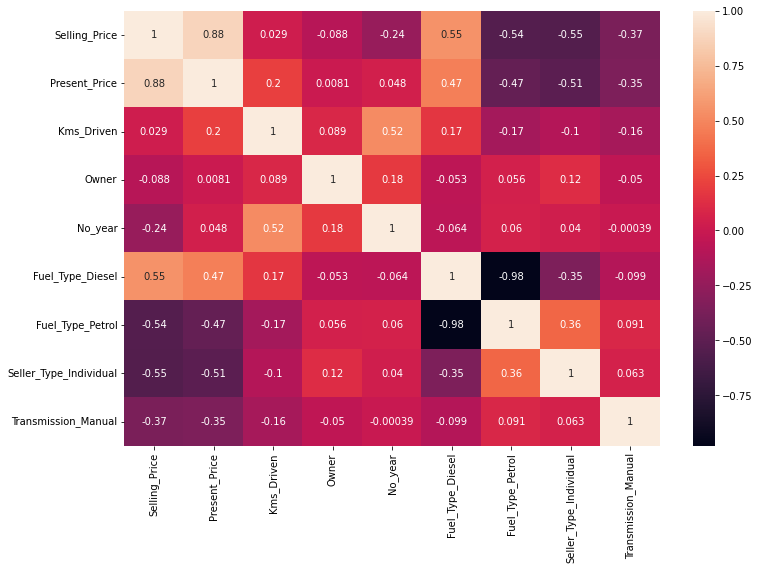

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(cor_mat,annot=True)
plt.show()

### split data set 

In [16]:
X=modified_data.iloc[:,1:]
y=modified_data.iloc[:,0]

In [17]:
from sklearn.model_selection import GridSearchCV ## Hyperparameter  tunning
from sklearn.ensemble import RandomForestRegressor ## model building
from sklearn.model_selection import train_test_split # spliting data set into training and test

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20)

In [19]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape # checking correctly split or not

((240, 8), (240,), (61, 8), (61,))

In [20]:
rf_model=RandomForestRegressor()

### Hyperparameter 

In [21]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

In [22]:
parameters= {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}


In [23]:
grid_search=GridSearchCV(rf_model,param_grid=parameters,scoring='neg_mean_squared_error', cv = 5, verbose=2, n_jobs = 1)

### finding best parameters

In [24]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits
[CV] max_depth=5, max_features=auto, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


Streaming output truncated to the last 5000 lines.
[CV] max_depth=10, max_features=auto, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_split=2, n_estimators=144 
[CV]  max_depth=10, max_fea

[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed: 23.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [26]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=188, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Prediction for test data

In [27]:
y_pred=grid_search.predict(X_test)

### Calculating R-square and adjusted R-square

In [41]:
y_bar=np.average(y_test)

In [50]:
SE_mse=np.sum((y_test-y_pred)*(y_test-y_pred)) ## Residual sum square 
SSE=np.sum((y_test-y_bar)*(y_test-y_bar)) ## Total sum square error

In [53]:
R_square = 1-(SE_mse/SSE)
round(R_square*100,2)

81.16

In [72]:
adj_Rsquare=1-(((1-R_square)*60)/(61-8-1))
round(adj_Rsquare*100,2)

78.26

- since R-square is 81.16% 
- almost 82% of totaal variation is describe by our model